In [1]:
!pip install joblib


     ------------------------------------ 302.2/302.2 kB 548.8 kB/s eta 0:00:00


In [33]:
import os
import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use("fivethirtyeight")

In [120]:
class Perceptron:
    def __init__(self,eta: float=None, epochs: int =None):
        self.weights=np.random.randn(3)*1e-4 ## to make weight smaller
        self.eta=eta
        self.epochs=epochs
        
    def _z_outcome(self,inputs,weights):
        return np.dot(inputs,weights)
    
    def Activation_function(self,z):
        return np.where(z>0,1,0)
        
    def fit(self,X,y):
        
        self.X=X
        self.y=y
        X_with_bias=np.c_[self.X,-np.ones((len(self.X),1))] ## This will Create metrix same as weight Updation metrix in notebook
        print(f"X with Bias is \n{X_with_bias}")
        
        for epoch in range(self.epochs):
            
            print("--"*10)
            print(f"for epoch >> {epoch + 1}")
            print("--"*10)
            
            z=self._z_outcome(X_with_bias,self.weights)
            y_hat=self.Activation_function(z)
            print(f"predicted value after forward pass: \n{y_hat}")
            
            self.error=self.y-y_hat
            print(f"Error is \n{self.error}")
            
            self.weights=self.weights + self.eta * np.dot(X_with_bias.T,self.error)
            print(f"Updated Weights after epochs: {epoch+1}/{self.epochs} are \n{self.weights}")
        
    def predict(self,X):
            X_with_bias=np.c_[X,-np.ones((len(X),1))]
            z=self._z_outcome(X_with_bias,self.weights)
            y_hat=self.Activation_function(z)
            return y_hat

In [121]:
def Prepare_data(dataframe,target_value="y"):
    X=dataframe.drop("y",axis=1)
    y=dataframe[target_value]
    return X,y

In [122]:
OR={
    "X1":[1,0,0,1],
    "X2":[0,1,0,1],
    "y":[1,1,0,1]  
}
df=pd.DataFrame(OR)

In [123]:
X,y=Prepare_data(df)

In [124]:
ETA=0.1
EPOCHS=10
OR_prediction=Perceptron(eta=ETA,epochs=EPOCHS)
OR_prediction.fit(X,y)

X with Bias is 
[[ 1.  0. -1.]
 [ 0.  1. -1.]
 [ 0.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 1
--------------------
predicted value after forward pass: 
[0 1 1 1]
Error is 
0    1
1    0
2   -1
3    0
Name: y, dtype: int64
Updated Weights after epochs: 1/10 are 
[ 9.99276140e-02  6.24654651e-05 -2.40297739e-05]
--------------------
for epoch >> 2
--------------------
predicted value after forward pass: 
[1 1 1 1]
Error is 
0    0
1    0
2   -1
3    0
Name: y, dtype: int64
Updated Weights after epochs: 2/10 are 
[9.99276140e-02 6.24654651e-05 9.99759702e-02]
--------------------
for epoch >> 3
--------------------
predicted value after forward pass: 
[0 0 0 1]
Error is 
0    1
1    1
2    0
3    0
Name: y, dtype: int64
Updated Weights after epochs: 3/10 are 
[ 0.19992761  0.10006247 -0.10002403]
--------------------
for epoch >> 4
--------------------
predicted value after forward pass: 
[1 1 1 1]
Error is 
0    0
1    0
2   -1
3    0
Name: y, dtype: int64
Updated Weig

In [125]:
or_pred=OR_prediction.predict(X=[[1,1]])

In [126]:
or_pred

array([1])

In [132]:
## For And GAte
AND={
    "X1":[1,0,0,1],
    "X2":[0,1,0,1],
    "y":[0,0,0,1]  
}
df_And=pd.DataFrame(AND)
X,y=Prepare_data(df_And)

In [135]:
And_prediction=Perceptron(eta=ETA,epochs=EPOCHS)

In [136]:
And_prediction.fit(X,y)

X with Bias is 
[[ 1.  0. -1.]
 [ 0.  1. -1.]
 [ 0.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 1
--------------------
predicted value after forward pass: 
[1 1 0 1]
Error is 
0   -1
1   -1
2    0
3    0
Name: y, dtype: int64
Updated Weights after epochs: 1/10 are 
[-0.0999227  -0.09990684  0.20001496]
--------------------
for epoch >> 2
--------------------
predicted value after forward pass: 
[0 0 0 0]
Error is 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
Updated Weights after epochs: 2/10 are 
[7.73024710e-05 9.31620531e-05 1.00014963e-01]
--------------------
for epoch >> 3
--------------------
predicted value after forward pass: 
[0 0 0 0]
Error is 
0    0
1    0
2    0
3    1
Name: y, dtype: int64
Updated Weights after epochs: 3/10 are 
[1.00077302e-01 1.00093162e-01 1.49626100e-05]
--------------------
for epoch >> 4
--------------------
predicted value after forward pass: 
[1 1 0 1]
Error is 
0   -1
1   -1
2    0
3    0
Name: y, dtype: int64
Updated Weights

In [141]:
And_pred=And_prediction.predict(X=[[0,0]])

In [142]:
And_pred

array([0])

In [143]:
## For XOR GAte
XOR={
    "X1":[1,0,0,1],
    "X2":[0,1,0,1],
    "y":[1,1,0,0]  
}
df_xor=pd.DataFrame(XOR)
X,y=Prepare_data(df_xor)

In [144]:
Xor_pred=Perceptron(eta=ETA,epochs=EPOCHS)
Xor_pred.fit(X,y)

X with Bias is 
[[ 1.  0. -1.]
 [ 0.  1. -1.]
 [ 0.  0. -1.]
 [ 1.  1. -1.]]
--------------------
for epoch >> 1
--------------------
predicted value after forward pass: 
[0 0 0 0]
Error is 
0    1
1    1
2    0
3    0
Name: y, dtype: int64
Updated Weights after epochs: 1/10 are 
[ 0.0999288   0.09994826 -0.19987235]
--------------------
for epoch >> 2
--------------------
predicted value after forward pass: 
[1 1 1 1]
Error is 
0    0
1    0
2   -1
3   -1
Name: y, dtype: int64
Updated Weights after epochs: 2/10 are 
[-7.12022641e-05 -5.17357662e-05  1.27645752e-04]
--------------------
for epoch >> 3
--------------------
predicted value after forward pass: 
[0 0 0 0]
Error is 
0    1
1    1
2    0
3    0
Name: y, dtype: int64
Updated Weights after epochs: 3/10 are 
[ 0.0999288   0.09994826 -0.19987235]
--------------------
for epoch >> 4
--------------------
predicted value after forward pass: 
[1 1 1 1]
Error is 
0    0
1    0
2   -1
3   -1
Name: y, dtype: int64
Updated Weights after

In [146]:
Xor_pred.predict(X=[[1,0]]) ## Give wrong output because the data of XOR 
#cannot be properly classified see graph for undersatnding

array([0])

Text(0, 0.5, 'X2')

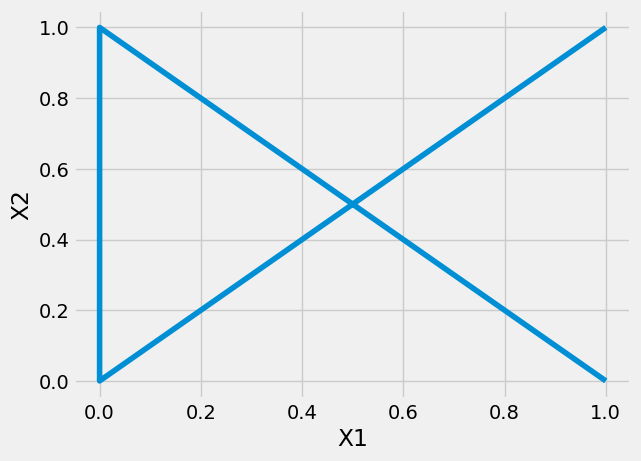

In [148]:
plt.plot(df_xor["X1"],df_xor["X2"])
plt.xlabel("X1")
plt.ylabel("X2")